In [14]:
from pathlib import Path
import json
import matplotlib.pyplot as plt


In [15]:
classes_info_array = []

scenes = [4, 15, 23]               #scenes saved in my laptop
for number in scenes:
    json_path = Path(fr'C:\Users\hussa\OneDrive\Desktop\Project\Dataset\INFRA-3DRC_scene-{number}\INFRA-3DRC_scene-{number}\camera_01\camera_01__annotation')

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

count_dict = {
    'adult': classes_info_array.count(1),
    'car' : classes_info_array.count(6),
    'bicycle' : classes_info_array.count(4),
    'motorcycle' : classes_info_array.count(5),
    'group' : classes_info_array.count(3),
    'bus' : classes_info_array.count(7),
}

Text(0, 0.5, 'count')

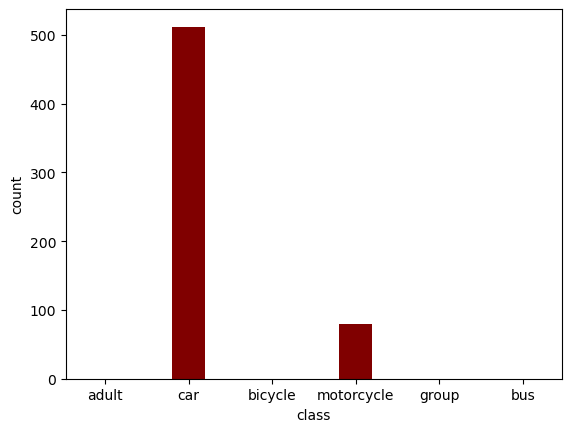

In [18]:
plt.bar(list(count_dict.keys()), list(count_dict.values()), color ='maroon', width = 0.4 )
plt.xlabel('class')
plt.ylabel('count')